# Logistic 回归



In [1]:
import random
import math
import numpy as np
import collections
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## 1. 生成样本和标号

In [2]:
# 画图参数
COLORS = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
MARKERS = ['o', 'v', '^', 's', 'P']

# 业务参数
DIM = 3
CLUSTR_NUM = 10


def generate_sample(clustr_num, width=30, std=3, smin=600, smax=700, gen_seed=9603602):
    """生成样本
    clustr_num: 簇数
    width: 空间点位于长宽高均为 width 的正方体内
    std: 生成样本时，样本与样本中心距离的标准差
    smin: 生成样本量时，样本量的最小值
    smax: 生成样本量时，样本量的最大值
    """
    if clustr_num > len(COLORS) * len(MARKERS):
        raise Exception("Error: clustr_num <= len(COLORS) * len(MARKERS)")
    dim = DIM
    res = collections.defaultdict(list)
    
    random.seed(gen_seed)
    for i in range(clustr_num):
        mean = [random.random() * width for _ in range(dim)]
        sample_num = round((smax - smin) * random.random()) + smin
        for r in np.random.normal(0, std, sample_num):
            deg = [random.random() * math.pi * 2 for _ in range(2)]
            node = [mean[0] + r * math.cos(deg[0]) * math.cos(deg[1]),
                    mean[1] + r * math.cos(deg[0]) * math.sin(deg[1]),
                    mean[2] + r * math.sin(deg[0])]
        
            res[i].append(node)

    return res

In [3]:
samples = dict(generate_sample(clustr_num=CLUSTR_NUM))
# samples

In [4]:
def _3d_plot(samples):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    mix = [(c, m) for c in COLORS for m in MARKERS]
    np.random.seed(19680801)
    np.random.shuffle(mix)
    for i, f in enumerate(samples.items()):
        k, v = f
        color, marker = mix[i]

        xs = [e[0] for e in v]
        ys = [e[1] for e in v]
        zs = [e[2] for e in v]
        ax.scatter(xs, ys, zs, color=color, marker=marker, label=k)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend = ax.legend(bbox_to_anchor=(.5, .30, .85, .5))

    plt.show()

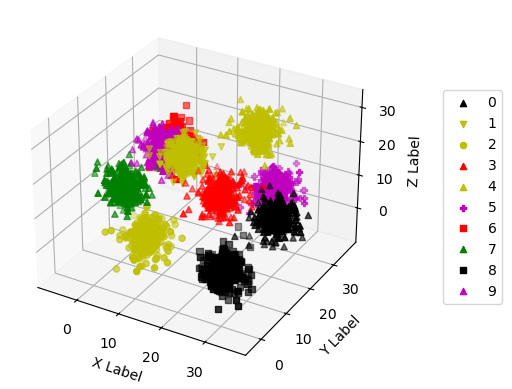

In [5]:
_3d_plot(samples)

## 2. 分割 训练集 和 预测集

In [6]:
def load_data(samples, div_rate=0.8):
    X, Y = [], []

    # 把输入整成适合sklearn输入的形状
    for lable, vlist in samples.items():
        for v in vlist:
            X.append(v)
            Y.append(lable)

    # 校验
    if not (div_rate <= 0.95 and div_rate > 0):
        raise Exception("Error: div_rate <= 0.95 and div_rate > 0")
    if len(X) != len(Y):
        raise Exception("Error: len(X) != len(Y)")

    # shuffle
    data = list(zip(X, Y))
    random.shuffle(data)
    X = [e[0] for e in data]
    Y = [e[1] for e in data]

    # 分割训练集和预测集
    div_num = math.floor(len(X) * div_rate)
    train_X, train_Y = X[:div_num], Y[:div_num]
    test_X, test_Y = X[div_num:], Y[div_num:]

    return train_X, train_Y, test_X, test_Y

In [7]:
train_X, train_Y, test_X, test_Y = load_data(samples)

In [8]:
sum(test_Y), len(test_Y)

(5920, 1294)

In [9]:
train_X[:3], train_Y[:3], test_X[:3], test_Y[:3]

([[20.870505487955644, 12.808838982239447, 12.782894501645105],
  [4.414529606162926, 30.665138802810183, 14.334348371667863],
  [4.577543019988589, 7.72168803834265, 16.856920238733487]],
 [3, 6, 7],
 [[29.544986715564832, 25.273502505926373, 1.8862821102974103],
  [25.29611093615888, 25.28218484985014, 13.019673385040345],
  [21.424873627080377, 14.540412941692265, 16.230068542396616]],
 [0, 5, 3])

## 3. 借助 sklearn 的简单实现

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [10]:
logreg = LogisticRegression(C=1e5, max_iter=100000)
logreg.fit(train_X, train_Y)

LogisticRegression(C=100000.0, max_iter=100000)

In [11]:
pred_Y = logreg.predict(test_X)
pred_Y

array([0, 5, 3, ..., 5, 2, 1])

In [12]:
def simple_accuracy(pred_Y, test_Y):
    l = [int(y==y_hat) for y, y_hat in zip(test_Y, pred_Y)]
    l_sum = sum(l)
    return l_sum, len(l), round(l_sum / len(l), 4)

In [13]:
pos, s, acc = simple_accuracy(pred_Y, test_Y)
print("预测正确的个数:", pos)
print("总数:", s)
print("精确率:", acc)

预测正确的个数: 1232
总数: 1294
精确率: 0.9521


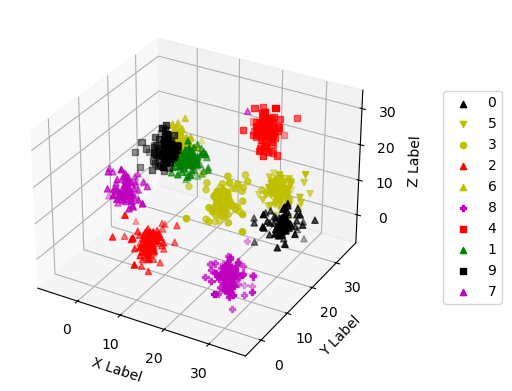

In [14]:
pred_samples = collections.defaultdict(list)
for xp, yp in zip(test_X, pred_Y):
    pred_samples[yp].append(xp)

_3d_plot(pred_samples)